# Customer Flight and Loyalty Analysis

In [1]:
# Importación de librerías necesarias
# -----------------------------------------------------------------------


# Tratamiento de datos
import pandas as pd
import numpy as np 
# -----------------------------------------------------------------------

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# -----------------------------------------------------------------------

# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------

# Evaluación de linealidad de las relaciones entre las variables y su distribución
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
# ------------------------------------------------------------------------------

# Configuración para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------------------

# Configuración para mejoras de la visualización
from IPython.display import display
# -----------------------------------------------------------------------


# Gestión de warnings
import warnings
warnings.filterwarnings("ignore")
# -----------------------------------------------------------------------


# Importación de DataFrames
df_flight = pd.read_csv("customer_flight_activity.csv")
df_loyalty = pd.read_csv("customer_loyalty_history.csv")

## 1. Exploratory Data Analysis and Preprocessing

### 1.1. **Data Exploration**

In [2]:
df_flight.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [3]:
df_flight.shape

(405624, 10)

In [4]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [5]:
df_loyalty.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [6]:
df_loyalty.shape

(16737, 16)

In [7]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

#### Realizamos la **unión** de ambos DataFrame a través de la columna común **'Loyalty Number'** y *EXPLORAMOS* este nuevo DataFrame:

In [8]:
df_customers = df_flight.merge(df_loyalty, on="Loyalty Number", how="outer")
df_customers.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


**Observación:**
> Tal y como podemos observar, los **'Loyalty number'** se repiten múltiples veces.

In [9]:
df_customers['Loyalty Number'].nunique()

16737

**Conclusión:**
> Comprobamos que el número de valores únicos de **'Loyalty Number'** de nuestro DataFrame final **df_customers** coincide con el número de entradas totales del DataFrame original **df_loyalty** (16737).

> Por tanto, la explicación de que aparezcan múltiples veces se debe a que, tras la unión de ambos DataFrame, cada **'Loyalty Number'** tiene asociados múltiples vuelos.

In [10]:
df_customers.shape

(405624, 25)

In [11]:
df_customers.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [12]:
df_customers.nunique()

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

In [13]:
df_customers.duplicated().sum()

1864

In [14]:
df_customers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [15]:
# Hacemos recuento de aquellas columnas con valores nulos:

nulls = df_customers.isnull().sum()
nulls.sort_values(ascending=False)

Cancellation Month             355560
Cancellation Year              355560
Salary                         102672
Postal Code                         0
Enrollment Month                    0
Enrollment Year                     0
Enrollment Type                     0
CLV                                 0
Loyalty Card                        0
Marital Status                      0
Education                           0
Gender                              0
Loyalty Number                      0
Year                                0
Province                            0
Country                             0
Dollar Cost Points Redeemed         0
Points Redeemed                     0
Points Accumulated                  0
Distance                            0
Total Flights                       0
Flights with Companions             0
Flights Booked                      0
Month                               0
City                                0
dtype: int64

Evaluamos el porcentaje de nulos de cada una de las columnas con nulos y el tipo de dato asociado a cada una de ellas:

In [16]:
# Transformamos los nulos a porcentaje de nulos:

nulls_percentage = nulls/df_customers.shape[0]*100


# Creamos una lista de las columnas con nulos sobre las cuales poder iterar:

columns_with_nulls = ['Cancellation Month', 'Cancellation Year', 'Salary']


for col in columns_with_nulls:
    print(f'La columna "{col}" es de tipo: {df_customers.dtypes[col]}.')
    print(f'Su porcentaje de nulos es {nulls_percentage[col]}')
    print('--------------------------------------------------------')

La columna "Cancellation Month" es de tipo: float64.
Su porcentaje de nulos es 87.65753505709722
--------------------------------------------------------
La columna "Cancellation Year" es de tipo: float64.
Su porcentaje de nulos es 87.65753505709722
--------------------------------------------------------
La columna "Salary" es de tipo: float64.
Su porcentaje de nulos es 25.31211170936631
--------------------------------------------------------


**Observaciones:**
> - Las tres columnas contienen variables relevantes para el análisis, pues tanto el salario como el porcentaje de cancelaciones de la membresía podrían ser interesantes para el estudio.

> - Las tres columnas contienen variables de tipo numérico.

> - Las tres columnas presentan un alto porcentaje de nulos, especialmente "Cancellation Year" y "Cancellation Month".

In [17]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [18]:
df_customers['Salary'].min()

-58486.0

**Observaciones:**

> **(1)** Algunas columnas podrían unirse, y el tipo de dato de algunas columnas podría ser susceptible de ser cambiado:

>    - ¿'Enrollment Year' y 'Enrollment Month' (int64) a una y/o de tipo object/date?

>    - ¿'Salary' (float64) a int64?

>    - ¿'Year' y 'Month' (int64) a una de tipo object/date?

>    - ¿'Cancellation Year' y 'Cancellation Month' (float64) a una de tipo object/date?

>    - La columna **'Country'** tiene un valor único

> **(2)** 'Salary' tiene una desviación estándar muy elevada, y valores negativos.

> **(3)** Hay 1864 entradas duplicadas.

> **(4)** Las columnas **'Salary'**, **'Cancellation Year'** y **'Cancellation Month'** tienen valores nulos, y conocemos la cantidad y porcentaje de los mismos.

> ***<u>Toma de decisiones por cada una de las observaciones, a continuación:</u>***

### 1.2. **Data Cleaning**

#### **Atypical Values, Data Types and Modifications**

> **(1)** Algunas columnas podrían unirse, y el tipo de dato de algunas columnas podría ser susceptible de ser cambiado:

- ¿'Enrollment Year' y 'Enrollment Month' (int64) a una y/o de tipo object/date?

- ¿'Salary' (float64) a int64? => *No hasta que no gestionemos los nulos.*

- ¿'Year' y 'Month' (int64) a una de tipo object/date? => *No, porque lo necesitaremos en este formato más adelante para la visualización.*

- ¿'Cancellation Year' y 'Cancellation Month' (float64) a una de tipo object/date? => *No hasta que no gestionemos los nulos.*

- La columna **'Country'** tiene un valor único: "Canada" => *Decidimos mantener esta columna, por si fuera relevante el país en algún punto de nuestro análisis.*

> *Convertimos 'Enrollment Year' y 'Enrollment Month' en una sola columna llamada **'Enrollment Date'**.*

In [19]:
# Creamos la nueva columna y la insertamos directamente en la posición que queremos:

df_customers.insert(21, 'Enrollment Date', df_customers[['Enrollment Year', 'Enrollment Month']].astype(str).agg('-'.join, axis=1))


# Eliminamos las dos columnas originales:

df_customers.drop(['Enrollment Year', 'Enrollment Month'], axis=1, inplace=True)


# Comprobamos los cambios:

df_customers.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Date', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

> **(2)** Tomamos una decisión con respecto a **'Salary'** (tenía una desviación estándar muy elevada, y valores negativos):

>   - *Transformaremos los valores negativos en nulos, ya que de todos modos tenemos un porcentaje elevado de nulos, y no podemos dejar los valores negativos, pues podrían impactar negativamente la distribución de esta variable.*

>   - Para ello, comprobaremos también que no altera excesivamente el porcentaje de nulos que ya tenemos en el DataFrame.

In [20]:
# Creamos una máscara para filtrar todos los valores de 'Salary' quee sean negativos:

negative_salary = df_customers[df_customers['Salary'] < 0]


# Y comprobamos a qué 'Loyalty Number' están asociados:
negative_salary_ids = negative_salary['Loyalty Number'].unique()


print(f'El recuento de valores cuyo "Salary" es negativo, es: {negative_salary.shape[0]}.')
print('------------------------------------------------------------------------------------')
print(f'Los "Loyalty Number" a los que hay asociado un salario negativo son: {negative_salary_ids}.')


El recuento de valores cuyo "Salary" es negativo, es: 480.
------------------------------------------------------------------------------------
Los "Loyalty Number" a los que hay asociado un salario negativo son: [115505 152016 194065 212128 232755 239955 347013 364596 366599 430398
 436087 491242 525245 542976 603070 729561 734647 790475 906428 959977].


In [21]:
# Sustituimos estos valores negativos por nulos:

df_customers.loc[df_customers['Loyalty Number'].isin(negative_salary_ids), 'Salary'] = np.nan 


# Y comprobamos que ya no existen 'Loyalty Number' cuyos 'Salary' sean negativos:

df_customers[df_customers['Salary'] < 0]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Year,Cancellation Month


In [22]:
salary_nulls_after_changes = df_customers['Salary'].isnull().sum()
salary_final_nulls_percentage = salary_nulls_after_changes/df_customers.shape[0]*100

print(f'El porcentaje final de nulos de "Salary" tras transformar los valores negativos en nulos es: {salary_final_nulls_percentage}.')

El porcentaje final de nulos de "Salary" tras transformar los valores negativos en nulos es: 25.430447902490975.


**Conclusión:**
> El nuevo porcentaje de nulos de 'Salary' (25.43%) no varía significativamente (originalmente era del 25.31%), por lo que decidimos mantener esta solución.

#### **Duplicates Management**
> **(3)** Hay 1864 entradas duplicadas.

Comprobamos si son duplicados que debemos mantener (como el número de 'Loyalty Number' repetidos) o si, por el contrario, hay filas enteras de valores duplicadas, susceptibles de ser eliminadas:

In [23]:
# Creamos una máscara para ver los duplicados (TODAS sus apariciones, incluida la "original") y revisarlos manualmente:

duplicates = df_customers[df_customers.duplicated(keep=False)]
duplicates

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Year,Cancellation Month
984,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017-1,NaN,NaN
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017-1,NaN,NaN
987,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017-1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017-1,NaN,NaN
989,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402331,992168,2017,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012-9,NaN,NaN
402346,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012-9,NaN,NaN
402347,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012-9,NaN,NaN
402354,992168,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012-9,NaN,NaN


**Conclusión:**
> Muchas de esas filas enteras están duplicadas, por lo que decidimos mantener su primera aparición y borrar el resto.

In [24]:
# Eliminamos las sucesivas apariciones:

df_customers = df_customers.drop_duplicates(keep='first')

Comprobamos que ya no hay filas duplicadas:

In [25]:
df_customers.duplicated().sum()

0

#### **Nulls Management**

> **(4)** Las columnas **'Salary'**, **'Cancellation Year'** y **'Cancellation Month'** tienen valores nulos, y conocemos la cantidad y porcentaje de los mismos.

##### Columnas **'Cancellation Year'** y **'Cancellation Month'**:
> *Decidimos convertir los datos que sí tienen valores (ahora mismo de tipo 'float') en 'object', juntar ambas columnas en una denominada 'Cancellation Date', y en aquellas entradas con valores nulos, los sustituiremos por 'Unknown', ya que desconocemos si son membresías que no han sido canceladas (y que por tanto se encuentran activas), o si por el contrario falta información (y preferimos no asumir que simplemente siguen activas).*

In [26]:
# Primero cambiamos los nulos a 'Unknown':

df_customers[['Cancellation Month', 'Cancellation Year']] = df_customers[['Cancellation Month', 'Cancellation Year']].fillna('Unknown')


# En segundo lugar, creamos una nueva columna ('Cancellation Date') formada por ambas columnas originales, y las convertimos
# a tipo 'object' para que el resto de datos también lo sean y todo esté cohesionado:

df_customers['Cancellation Date'] = df_customers['Cancellation Year'].astype(str) + '-' + df_customers['Cancellation Month'].astype(str)


# Finalmente, eliminamos las columnas originales:

df_customers.drop(columns=['Cancellation Year', 'Cancellation Month'], inplace=True)


# Y hacemos la comprobación de que todo ha quedado como esperábamos:
df_customers.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
69761,256483,2018,6,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Married,Aurora,8647.14,Standard,2014-12,Unknown-Unknown
357503,892227,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Doctor,141278.0,Married,Star,8693.63,Standard,2018-12,Unknown-Unknown
25787,158113,2018,1,3,2,5,905,90.0,0,0,Canada,Alberta,Calgary,T3E 2V9,Female,College,NaN,Single,Nova,9764.95,Standard,2012-6,Unknown-Unknown
334188,839263,2018,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,91239.0,Married,Star,5838.90,Standard,2015-10,2018.0-12.0
233531,616722,2018,1,3,0,3,477,47.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,89435.0,Divorced,Star,2619.34,Standard,2012-8,Unknown-Unknown


In [27]:
# Limpiamos la columna 'Cancellation Date' para que quede más clara:

    # Quitamos los '.0':
df_customers['Cancellation Date'] = df_customers['Cancellation Date'].str.replace(r'\.0', '', regex=True)

    # Dejamos un solo 'Unknown':
df_customers['Cancellation Date'] = df_customers['Cancellation Date'].replace('Unknown-Unknown', 'Unknown')

Finalmente, calculamos que el porcentaje de 'Unknown' coincida con el porcentaje de nulos anterior, y que por tanto se han aplicado correctamente:
> La sustitución de nulos por 'Unknown'

> La unión de las columnas 'Cancellation Year' y 'Cancellation Month' en 'Cancellation Date'

In [28]:
percentage_unknown = df_customers['Cancellation Date'].value_counts(normalize=True).mul(100)['Unknown']
print(f'El porcentaje de "Unknown" es: {percentage_unknown}, lo que coincide con el porcentaje de nulos que teníamos anteriormente para las columnas "Cancellation Month" y "Cancellation Year" (87.7%).')

# Visualizamos los cambios:
df_customers.sample(5)

El porcentaje de "Unknown" es: 87.70309094511592, lo que coincide con el porcentaje de nulos que teníamos anteriormente para las columnas "Cancellation Month" y "Cancellation Year" (87.7%).


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
78125,274817,2017,7,9,0,9,3528,352.00,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,College,NaN,Single,Aurora,6511.10,Standard,2014-8,Unknown
357541,892273,2018,2,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,2194.67,Standard,2012-9,Unknown
365576,910391,2017,9,10,7,17,1615,161.00,0,0,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,67220.0,Single,Aurora,8346.98,Standard,2013-1,Unknown
315081,796429,2017,10,0,0,0,0,0.00,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,NaN,Single,Nova,3059.18,Standard,2013-6,2014-2
248725,651281,2018,2,10,0,10,2170,234.36,0,0,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,54529.0,Married,Star,31161.75,Standard,2015-7,Unknown


##### Columna **'Salary'**:

In [29]:
print(f'Recordamos que la columna "Salary" es de tipo: {df_customers.dtypes["Salary"]}.')
print('--------------------------------------------------------------------------------')
print(f'Que su porcentaje de nulos es {salary_final_nulls_percentage}.')
print('--------------------------------------------------------------------------------')
print(f'Y que la distribución de sus valores (incluidos nulos) es la siguiente: {df_customers['Salary'].value_counts(dropna=False, normalize=True) * 100}')

Recordamos que la columna "Salary" es de tipo: float64.
--------------------------------------------------------------------------------
Que su porcentaje de nulos es 25.430447902490975.
--------------------------------------------------------------------------------
Y que la distribución de sus valores (incluidos nulos) es la siguiente: Salary
NaN         25.445809
101933.0     0.136715
61809.0      0.083218
51573.0      0.083218
62283.0      0.083218
              ...    
54610.0      0.005944
281486.0     0.005944
79403.0      0.005944
63506.0      0.005944
46594.0      0.005944
Name: proportion, Length: 5871, dtype: float64


Representación gráfica de lo anterior:

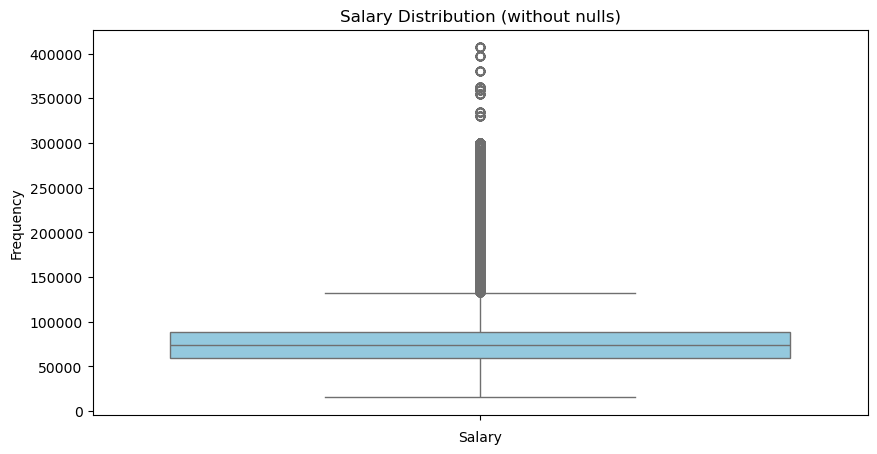

In [30]:
plt.figure(figsize=(10, 5))

sns.boxplot(df_customers['Salary'].dropna(), color='skyblue')

plt.title("Salary Distribution (without nulls)")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.show()

**Conclusiones:**
> - La caja azul muestra el rango en el que se encuentra el 50% de los valores de 'Salary', con la mediana de estos valores casi en el límite superior de este rango, seguramente, debido a la gran cantidad de outliers que se encuentran por encima del máximo.

> - 'Salary' tiene un alto porcentaje de nulos, por lo que decidimos emplear técnicas avanzadas de inferenciación, como **IterativeImputer**.

In [31]:
# Creamos y aplicamos la inferenciación:

imputer_iterative = IterativeImputer(max_iter = 100, random_state = 42)
df_customers['Salary'] = imputer_iterative.fit_transform(df_customers[['Salary']])


# Comprobamos los cambios:

df_customers.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
392665,969924,2017,2,6,4,10,3060,306.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,79441.628829,Single,Star,7602.66,Standard,2013-8,Unknown
140250,413266,2018,7,15,11,26,5252,525.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Male,College,79441.628829,Single,Nova,9333.08,Standard,2016-9,Unknown
144393,422803,2018,3,3,3,6,3156,340.2,701,57,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,50879.000000,Single,Star,3933.81,Standard,2017-3,Unknown


In [32]:
# Como salen demasiados decimales en 'Salary', redondeamos a 2 decimales y comprobamos una última vez los cambios:

df_customers['Salary'] = df_customers['Salary'].round(2)
df_customers.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
206983,560149,2017,8,14,0,14,3458,345.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,64417.00,Single,Aurora,12036.62,Standard,2016-9,Unknown
232153,614379,2017,2,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,College,79441.63,Single,Star,2222.87,Standard,2014-2,Unknown
114442,354477,2017,11,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,College,79441.63,Single,Star,2504.44,Standard,2016-5,Unknown


Comprobamos que ya no hay ninguna columna con valores nulos:

In [33]:
df_customers.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Date                0
Cancellation Date              0
dtype: int64

#### Guardamos el fichero final sobre el que hemos realizado la limpieza:

In [34]:
df_customers.to_csv('df_customers_final.csv')

## 2. Visualization

#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

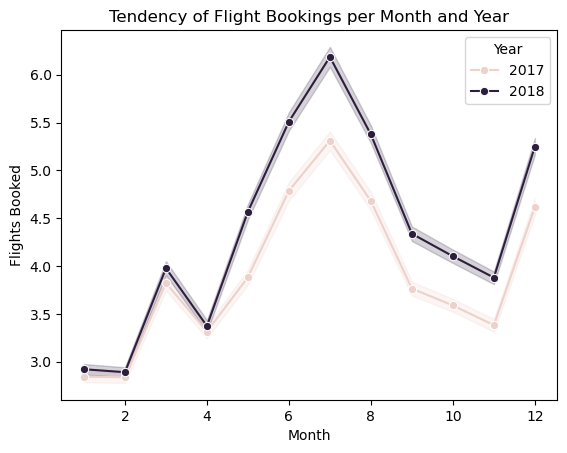

In [35]:
sns.lineplot(x='Month', y='Flights Booked', hue='Year', data=df_customers, marker='o')

plt.title('Tendency of Flight Bookings per Month and Year')
plt.xlabel('Month')
plt.ylabel('Flights Booked')

plt.show()

**Conclusiones:**
> Aunque en el año 2018 hubo, por lo general, un mayor número de vuelos reservados, la tendencia a lo largo de los meses en ambos años es similar, presentando su mayor subida en los meses de verano (Junio-Agosto), seguido por Diciembre, y finalmente en el mes de Marzo.

Elección del gráfico:
> *Hemos decidido hacer un gráfico de líneas básico porque estamos analizando una tendencia: una variable numérica (cantidad de vuelos resevados) en función de una variable categórica (mes), a su vez agrupada por otra variable categórica (año). También se podría haber visualizado con un gráfico de barras.*

#### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

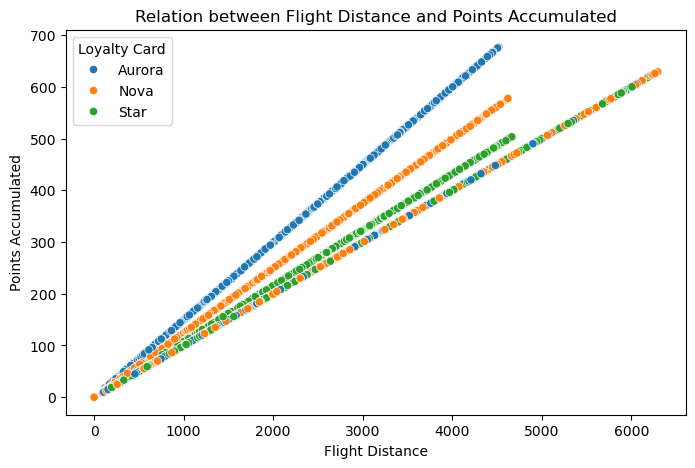

In [36]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x = 'Distance', y = 'Points Accumulated', hue='Loyalty Card', data = df_customers)

plt.title('Relation between Flight Distance and Points Accumulated')
plt.xlabel('Flight Distance')
plt.ylabel('Points Accumulated')

plt.show()

**Conclusiones:**
> Sí que existe una relación, pues a mayor distancia de los vuelos, más puntos acumulan los clientes.
> Además, se pudo observar cómo, independientemente de usar o no el parámetro 'hue' para agrupar por tipo de tarjeta de fidelización, se forman cuatro líneas compuestas por los puntos del diagrama de dispersión, posiblemente derivada por la fuerte correlación existente entre la distancia de los vuelos y puntos acumulados, por cada tipo de tarjeta de fidelización.

Elección del gráfico:
> *Como estamos analizando dos variables numéricas, lo más interesante es realizar un gráfico de dispersión.*

#### 3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada provincia.

**OBSERVACIÓN IMPORTANTE:**
> Las visualizaciones que vienen a continuación (inclusive esta) están basadas, en algún punto, en el recuento de clientes, de modo que es importante eliminar los **'Loyalty Number'** duplicados para así aumentar la precisión del análisis:

In [37]:
# Creamos un DataFrame filtrando únicamente las columnas de interés de cara a las visualizaciones que vienen a continuación:

df_filtered = df_customers[['Loyalty Number', 'Province', 'Salary', 'Loyalty Card', 'Education', 'Marital Status', 'Gender']]

In [38]:
# Valoramos los duplicados de estas columnas:

duplicates2 = df_filtered[df_filtered.duplicated(keep=False)]

print(f'El total de valores duplicados en el DataFrame filtrado es: {df_filtered.duplicated().sum()}.')
print('------------------------------------------------------------------------------------')
print(f'Y estos duplicados son:')
duplicates2

El total de valores duplicados en el DataFrame filtrado es: 387023.
------------------------------------------------------------------------------------
Y estos duplicados son:


,Loyalty Number,Province,Salary,Loyalty Card,Education,Marital Status,Gender
0,100018,Alberta,92552.0,Aurora,Bachelor,Married,Female
1,100018,Alberta,92552.0,Aurora,Bachelor,Married,Female
2,100018,Alberta,92552.0,Aurora,Bachelor,Married,Female
3,100018,Alberta,92552.0,Aurora,Bachelor,Married,Female
4,100018,Alberta,92552.0,Aurora,Bachelor,Married,Female
...,...,...,...,...,...,...,...
405619,999986,Ontario,46594.0,Nova,Bachelor,Married,Female
405620,999986,Ontario,46594.0,Nova,Bachelor,Married,Female
405621,999986,Ontario,46594.0,Nova,Bachelor,Married,Female
405622,999986,Ontario,46594.0,Nova,Bachelor,Married,Female


In [39]:
df_filtered_without_dup = df_filtered.drop_duplicates(keep='first')

print(f'El recuento de duplicados del DataFrame filtrado, tras la eliminación de los mismos, es:\n{df_filtered_without_dup.duplicated().sum()}')

El recuento de duplicados del DataFrame filtrado, tras la eliminación de los mismos, es:
0


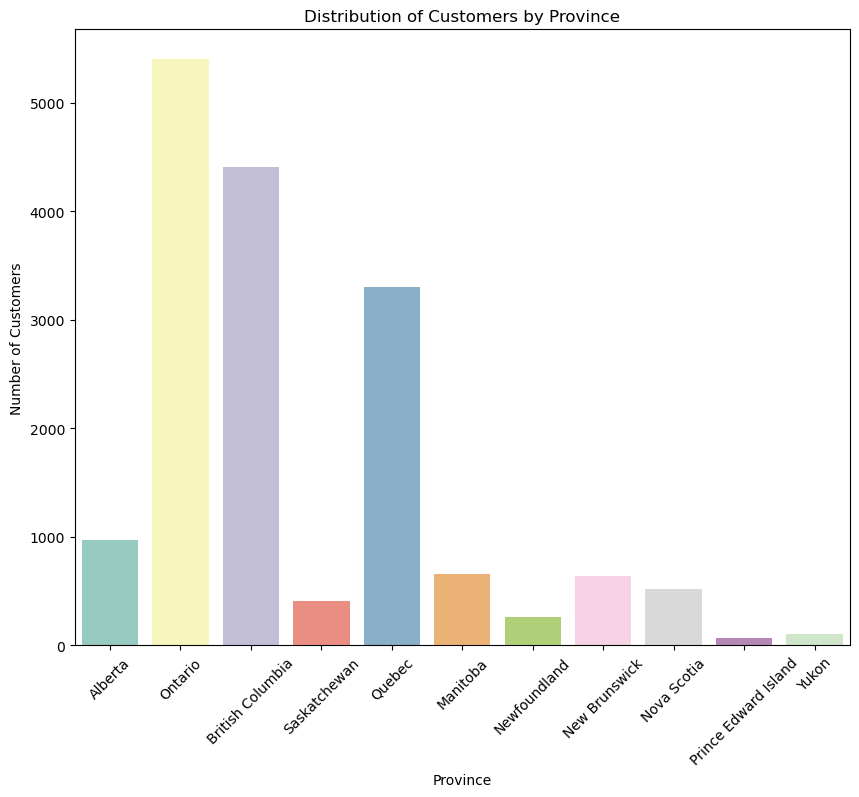

In [40]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Province', data=df_filtered_without_dup, palette='Set3')

plt.title('Distribution of Customers by Province')
plt.xlabel('Province')
plt.ylabel('Number of Customers')

plt.xticks(rotation=45)

plt.show()

**Conclusiones:**
> La mayor parte de los clientes proviene de Ontario, seguidos British Columbia y, en tercer lugar, Quebec.

Elección del gráfico:
> *Hemos utilizado un diagrama de barras apiladas porque permite el recuento directo la cantidad de ocurrencias (en este caso, clientes) por cada categoría (en este caso, provincia).*

#### 4. Compara el salario promedio por nivel educativo.

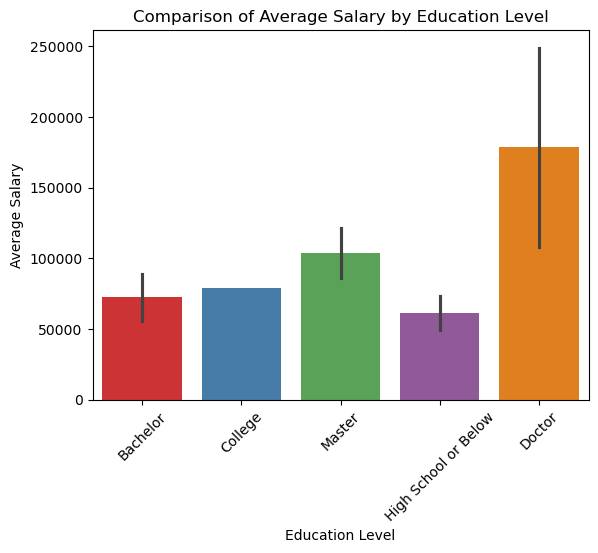

In [41]:
sns.barplot(x='Education', y='Salary', estimator=np.mean, ci='sd', data=df_filtered_without_dup, palette='Set1')

plt.title('Comparison of Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')

plt.xticks(rotation=45)

plt.show()

**Conclusiones:**
> - El salario medio más alto lo tienen aquellos clientes cuyo nivel educativo es de 'Doctor', seguido por aquellos que cursaron un 'Master'.
> - Además, aunque la media del salario de los/as doctores es la más alta, el salario de estos/as doctores podría variar más con respecto a otros niveles educativos.

Elección del gráfico:
> *Utilizar un diagrama de barras permite comparar la variable categórica (el nivel educativo) con una numérica (el salario), de la que necesitamos su media. Hemos añadido el parámetro "estimator=np.mean, ci='sd'" con el fin de mostrar también la desviación estándar, y así poder ver dónde se mueven esos valores en torno a la media.*

#### 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?

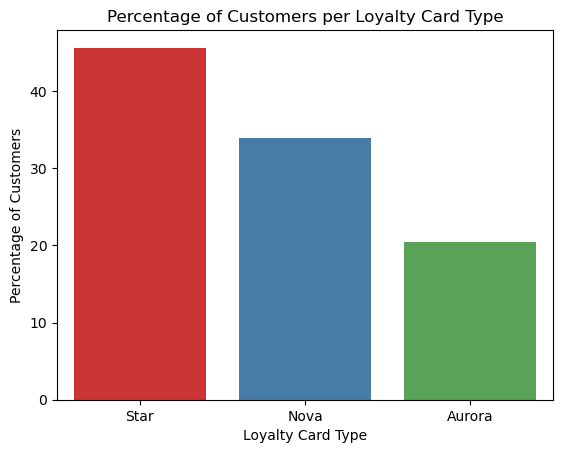

In [42]:
# Primero es necesario calcular el porcentaje de clientes por cada tipo de tarjeta (donde cada tipo tipo de tarjeta es el 100%):

percentage_loyalty_clients_without_dup = df_filtered_without_dup['Loyalty Card'].value_counts(normalize=True)*100 

# Con esto, es posible realizar la visualización:

sns.barplot(x=percentage_loyalty_clients_without_dup.index, y=percentage_loyalty_clients_without_dup.values, palette='Set1') 
# donde 'index' será cada tipo de tarjeta, y 'values' los porcentajes de clientes asociados a cada tipo de tarjeta

plt.title('Percentage of Customers per Loyalty Card Type')
plt.xlabel('Loyalty Card Type')
plt.ylabel('Percentage of Customers')

plt.show()

**Conclusiones:**
> El mayor porcentaje de clientes tiene la tarjeta de fidelización "Star", seguido por "Nova" y finalmente "Aurora".

Elección del gráfico:
> *Una vez más, utilizamos un diagrama de barras para comparar la variable categórica (el tipo de tarjeta de fidelización) con una numérica (el número de clientes), de la que necesitamos su porcentaje.*

#### 6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres.

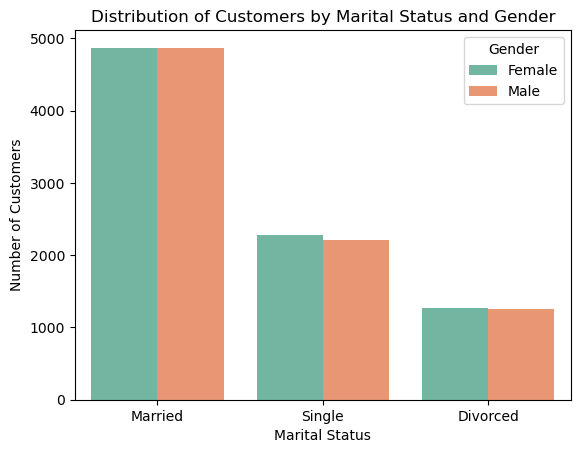

In [43]:
sns.countplot(x='Marital Status', hue='Gender', data=df_filtered_without_dup, palette='Set2')

plt.title('Distribution of Customers by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

plt.show()

**Conclusiones:**
> La mayor parte de los clientes son casados, seguidos por solteros (donde predominan ligeramente las mujeres), y por último los divorciados (predominando también ligeramente las mujeres).

Elección del gráfico:
> *En este caso, un diagrama de barras apiladas permite contar directamente la cantidad de ocurrencias (en este caso clientes) dentro de cada categoría de estado civil.*

## 3. Evaluation of Differences in Flight Bookings by Educational Level

In [44]:
df_filtered2 = df_customers[['Flights Booked', 'Education']]
print(f'A continuación, podemos observar el nuevo DataFrame, que incluye únicamente las columnas de interés para este análisis:\n--------------------------------\n{df_filtered2}')

A continuación, podemos observar el nuevo DataFrame, que incluye únicamente las columnas de interés para este análisis:
--------------------------------
        Flights Booked Education
0                    3  Bachelor
1                    2  Bachelor
2                    6  Bachelor
3                    4  Bachelor
4                    0  Bachelor
...                ...       ...
405619              15  Bachelor
405620               0  Bachelor
405621               6  Bachelor
405622              11  Bachelor
405623               0  Bachelor

[403760 rows x 2 columns]


#### **Análisis descriptivo**

In [45]:
# Para poder calcular los estadísticos básicos del número de vuelos por cada nivel educativo, primero será necesario realizar dicha agrupación:

df_flights_education = df_filtered2.groupby('Education')['Flights Booked']

# Seguido por el cálculo de los mismos:
mean_flights = df_flights_education.mean()
median_flights = df_flights_education.median()
std_flights = df_flights_education.std()

print(f"La media del número de vuelos reservados por nivel educativo, es:\n----------\n{np.round(mean_flights, 2)}")
print('-------------------------------------------------------------------------------------------')
print(f"La mediana del número de vuelos reservados por nivel educativo, es:\n----------\n{np.round(median_flights, 2)}")
print('-------------------------------------------------------------------------------------------')
print(f"La desviación estándar del número de vuelos reservados por nivel educativo, es:\n----------\n{np.round(std_flights, 2)}")

La media del número de vuelos reservados por nivel educativo, es:
----------
Education
Bachelor                4.11
College                 4.17
Doctor                  4.18
High School or Below    4.18
Master                  4.20
Name: Flights Booked, dtype: float64
-------------------------------------------------------------------------------------------
La mediana del número de vuelos reservados por nivel educativo, es:
----------
Education
Bachelor                1.0
College                 1.0
Doctor                  1.0
High School or Below    1.0
Master                  1.0
Name: Flights Booked, dtype: float64
-------------------------------------------------------------------------------------------
La desviación estándar del número de vuelos reservados por nivel educativo, es:
----------
Education
Bachelor                5.22
College                 5.25
Doctor                  5.26
High School or Below    5.24
Master                  5.21
Name: Flights Booked, dtype: float6

Representación gráfica de lo anterior:

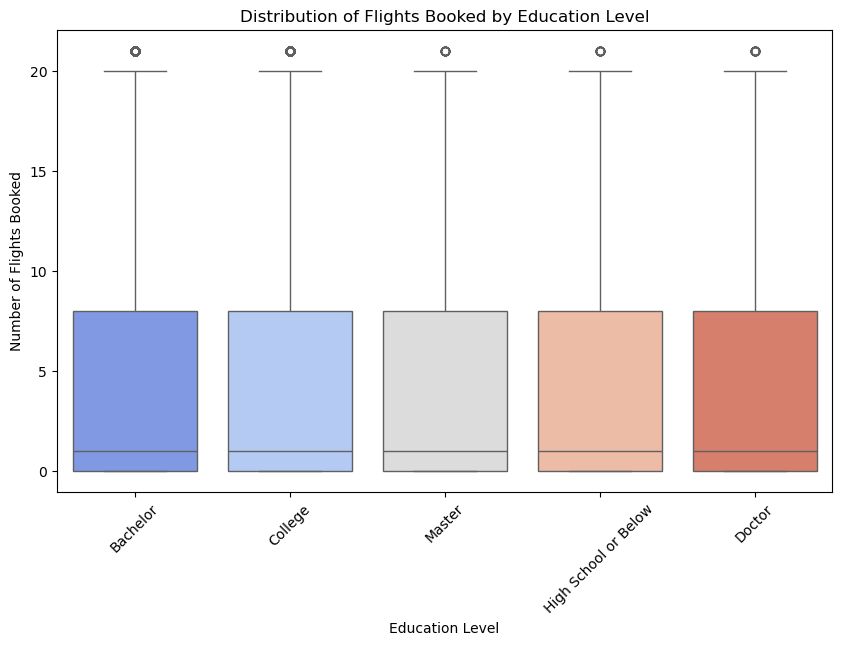

In [46]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Education", y="Flights Booked", data=df_customers, palette="coolwarm")

plt.title("Distribution of Flights Booked by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Flights Booked")

plt.xticks(rotation=45)

plt.show()

**Conclusiones:**
> Como podemos observar, a priori no existen diferencias entre la media, mediana y desviación estándar del número de vuelos reservados entre cada nivel educativo.

#### **Análisis inferencial**

In [47]:
# Creamos la función de prueba de hipótesis que aplicaremos entre cada grupo de nivel educativo:

def hypothesis_test(*args):
    """
    Performs a hypothesis test to compare groups.
    1. First, it checks if the data is normal using the Shapiro-Wilk or Kolmogorov-Smirnov test.
    2. If the data is normal, it uses Bartlett's test to check for equal variances. If not, it uses Levene's test.
    3. If variances are equal, it applies Student's t-test; otherwise, it applies Welch's t-test.
    4. If the data is not normal, it uses the Mann-Whitney U test.

    Parameters:
    *args: lists or arrays containing the data for each group. It expects TWO groups to compare.

    Returns:
    dict with the results of the normality test, variance test, and hypothesis test.
    """

    # Verify that at least two groups are provided
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")

    # Check normality in each group
    normality = []
    for group in args:
        if len(group) > 50:
            p_value_norm = stats.kstest(group, 'norm').pvalue  # Kolmogorov-Smirnov if n > 50
        else:
            p_value_norm = stats.shapiro(group).pvalue  # Shapiro-Wilk if n <= 50
        normality.append(p_value_norm > 0.05)

    data_is_normal = all(normality)  # True if all groups are normal

    # Variance equality test
    if data_is_normal:
        p_value_variance = stats.bartlett(*args).pvalue  # Bartlett test if data is normal
    else:
        p_value_variance = stats.levene(*args, center="median").pvalue  # Levene test if data is not normal

    equal_variances = p_value_variance > 0.05

    # Apply the appropriate test
    if data_is_normal:
        if equal_variances:
            t_stat, p_value = stats.ttest_ind(*args, equal_var=True)
            test_used = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_value = stats.ttest_ind(*args, equal_var=False)
            test_used = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_value = stats.mannwhitneyu(*args)
        test_used = "Mann-Whitney U"

    # Significance level
    alpha = 0.05

    # Results
    result = {
        "Test de Normalidad": normality,
        "Datos Normales": data_is_normal,
        "p-valor Varianza": p_value_variance,
        "Varianzas Iguales": equal_variances,
        "Test Usado": test_used,
        "Estadístico": t_stat,
        "p-valor": p_value,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos." if p_value < alpha else "No se rechaza H0. Es decir, no hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos."
    }

    # Print results in a clear format
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if data_is_normal else 'No'}")
    print(f"   - Normalidad por grupo: {normality}")
    print(f"✅ Test de Varianza: {'Iguales' if equal_variances else 'Desiguales'} (p = {p_value_variance:.4f})")
    print(f"✅ Test aplicado: {test_used}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_value:.4f}")
    print(f"🔍 Conclusión: {result['Conclusión']}\n")

In [48]:
# Creamos cada grupo de nivel educativo sobre los que aplicaremos la prueba de hipótesis:

highschool_group = df_customers[df_customers['Education']=='High School or Below']['Flights Booked']
college_group = df_customers[df_customers['Education']=='College']['Flights Booked']
bachelor_group = df_customers[df_customers['Education']=='Bachelor']['Flights Booked']
master_group = df_customers[df_customers['Education']=='Master']['Flights Booked']
doctor_group = df_customers[df_customers['Education']=='Doctor']['Flights Booked']

A continuación, aplicamos la prueba de hipótesis a cada par de nivel educativo (ordenados de menor a mayor nivel), pues queremos determinar si existe una diferencia 
significativa en el número de vuelos reservados entre cada uno de ellos:

In [49]:
hypothesis_test(highschool_group, college_group)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 969453228.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos.



In [50]:
hypothesis_test(college_group, bachelor_group)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12993040557.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos.



In [51]:
hypothesis_test(bachelor_group, master_group)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos.



In [52]:
hypothesis_test(master_group, doctor_group)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 109499288.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas en el número de vuelos que reservan cada uno de estos dos grupos.



**Conclusiones:**
> A pesar de que al analizar la estadística descriptiva y representar gráficamente la distribución del número de vuelos con respecto a cada nivel educativo no pareciese haber diferencias, sí que existen algunas, tal y como podemos comprobar al aplicar estadística inferencial:

>   - Si bien no hay diferencias significativas entre el número de vuelos reservados por aquellos clientes cuyo nivel educativo es 'Highschool or Below' y 'College',
>   - sí que las hay entre aquellos cuyo nivel educativo es 'College', 'Bachelor' y 'Master';
>   - sin embargo, no hay diferencia significativa entre el número de vuelos reservados por aquellos clientes que cursaron un máster, y aquellos con el título de 'Doctor'